ds105-agenda-fall23
===================



## Code along in Python: unicorn companies



This is a demo notebook using R and the R shell (R Core Team, 2022) as
part of an DataCamp workspace demo originally developed by DataCamp
for Python (Schouwenaars & Cotton, 2022). Along the way, we'll also
test the "AI" and the shared editing functions. We use the "unicorns"
dataset (CB Insights, 2023) to demonstrate the following data
analytics steps:

1.  Importing a CSV file as a `data.frame`
2.  Viewing `unique` column data
3.  Cleaning a data frame column
4.  Grouping data by column values
5.  Creating a barplot of category counts



### Unicorn Companies



A [unicorn company](https://en.wikipedia.org/wiki/Unicorn_(finance)) is a privately held startup company with a current
valuation of over $1 billion USD. In this workspace, we'll be looking
at a dataset that consists of unicorn companies and startups across
the globe as of November 2021, including country of origin, sector,
select investors, and valuation of each unicorn. Former unicorn
companies that have since exited due to IPO (Initial Public Offering)
or acquisitions are not included in this list.



### Importing a CSV file as data frame



We import the CSV file as a data frame and print the column headers
(alongside other information) with the `str` function. If you only want
the headers as a vector, use `colnames` instead:



In [1]:
df = read.csv('../data/unicorn_companies.csv')
str(df)
colnames(df)

You can also print the data frame directly. When you run this cell,
either with the mouse or by entering CTRL-ENTER, the first 10 records
of the DataFrame `df` and the headline with the features are shown. At
the bottom of the output you see an option to create a `Chart` - better
wait with that until you understand the data set better.



In [1]:
df

Though the data look quite clean and appealing, a table view is not
the best way to get an overview - there are too many records.



### Viewing `unique` column data



For investment purposes, the `Category` column or feature is most
interesting: this is the type of company. How many of these types
are there?

To print out all unique categories, we can use the `unique`
function, which will return all unique entries in the `Category`
column if we index the data frame accordingly.



In [1]:
unique(df$Category) # df['Category'] or df[,5] also work

You can see that there are duplicates because of typos
(`Finttech`) and capitalization (`Artificial Intelligence`). Let's
remove the ambiguities.

To get help, you can use `?` or the `help` function:

    ?unique
    help(unique)

There is a lot of help information here and you may want to look at it
on the web instead e.g. using [this function index for base R](https://stat.ethz.ch/R-manual/R-devel/library/base/html/00Index.html).



### Testing the AI coding assistant



This is a good place to show off your `AI` assistant: you may not know
how to look for help for `unique`. Add an `AI` code block. The assistant
will ask you for a prompt. For simple questions like these, almost any
prompt will do, e.g. ``I need help for the function `unique`.`` The marks
around `unique` will help the computer understand that you mean a
command (these marks are also used for coding font markdown in text
blocks).

The AI returns the whole documentation but We only want a short
explanation that an absolute beginner can understand. Let's ask for
that directly:
> As an absolute beginner in R, I need a very short explanation
> of what \`unique\` does and how I can use it on a column of a data
> frame.The answer is good and short:
> # The \`unique\` function in R returns the unique values in a vector or
> # column of a data frame.  To use \`unique\` on a column of a data
> # frame, you can specify the column name using the \`$\` operator.  For
> # example, to get the unique values in the "Company" column of the
> # \`df\` data frame:
> unique(df$Company)To test the AI yet again, remove the last parenthesis after the
function call to `unique`: `unique(df$Category`. This yields an error. At
the bottom of the output, you can click on `Fix & explain`. The
explanation is good.

Let's try to trip the AI up. Replacing `$` by `%` does not work. The error
is correctly identified and fixed. But if we try to run
`unique(df[Category])`, the AI suggests the `$` operator once again and
does not identify the quickest (or the alternative) solution,
`unique(df['Category']`.

These experiments show that we're still quite far away from getting
fully relieved of our coding burdens but for simple fixes, it's pretty
good.



### Clean data frame column `Category`



There are a couple of typos in the `Category` values: 'Artificial
intelligence' needs to become 'Artificial Intelligence', and
'Finttech' needs to become 'Fintech' everywhere in the dataframe.

You can do this with `gsub`, which matches the first argument
and replaces it by the second everywhere in the column:



In [1]:
## Correct typos in the 'Category' column
df$Category <- gsub("Artificial intelligence", "Artificial Intelligence", df$Category)
df$Category <- gsub("Finttech", "Fintech", df$Category)

## Display the first few rows to verify the changes
unique(df$Category)

### Share editing rights



One of the neater properties of DataCamp Workspace is the ability to
share your notebook and edit synchronously like in GoogleDocs.

Click on the sharing sign at the top and share **editing** access
with your neighbor by using his/her email. Also, reduce "General
access" to "Disable access" - now nobody except those you invite via
email can see your file.

You have to use the person's email used for DataCamp - make sure
it's their Lyon College email. Once they've been invited, you can
let them access to edit, view, comment or remove their access.

Print the cleaned dataframe `df` in each other's notebooks by
adding a new code block with the command `df` and run it.

Once this is done, `Remove` access from your workspace for the
other person.



### Grouping data by column values



Now that the categories are cleaned up, we group by `Category`. In R, we
can do this with the `dplyr` package, or with `data.table`, or with base
R.

With base R, we can use the `stats::aggregate` function, which splits
the data into subsets.



In [1]:
## Group by 'Category' and get the count in each category
grouped_df <- aggregate(Company ~ Category, data=df1, FUN=length)
colnames(grouped_df)[2] <- "Count"

## Display the grouped data
grouped_df

#+begin_example
                              Category Count
1              Artificial Intelligence    72
2                Auto & transportation    30
3                    Consumer & retail    23
4                        Cybersecurity    38
5          Data management & analytics    35
6      E-commerce & direct-to-consumer    97
7                               Edtech    27
8                              Fintech   185
9                             Hardware    32
10                              Health    62
11        Internet software & services   164
12         Mobile & telecommunications    36
13                               Other    51
14 Supply chain, logistics, & delivery    51
15                              Travel    14
#+end_example

The function `order` returns a permutation that rearranges
its first argument into ascending (default) or descending order:



In [1]:
## Sort grouped_df by 'Count' in ascending order:
grouped_df <- grouped_df[order(grouped_df$Count),]
grouped_df

### Creating a barplot of category counts



Plotting is a cinch in R: the `barplot` function will create a simple
bar plot of `grouped_df` right away:



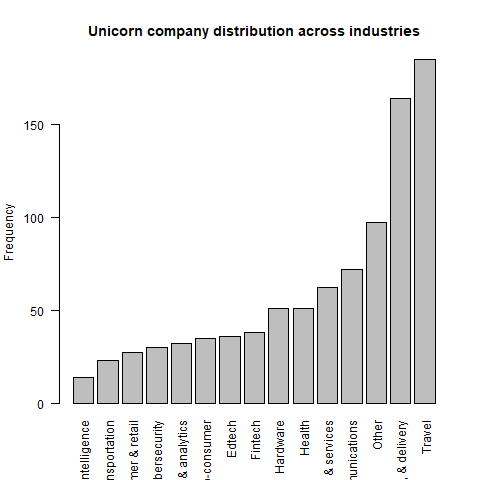

In [1]:
barplot(grouped_df$Count ~ sort(grouped_df$Category),
        ylab = "Frequency", xlab = "",
        main = "Unicorn company distribution across industries",
        las = 2)

Here is a more customized plot:



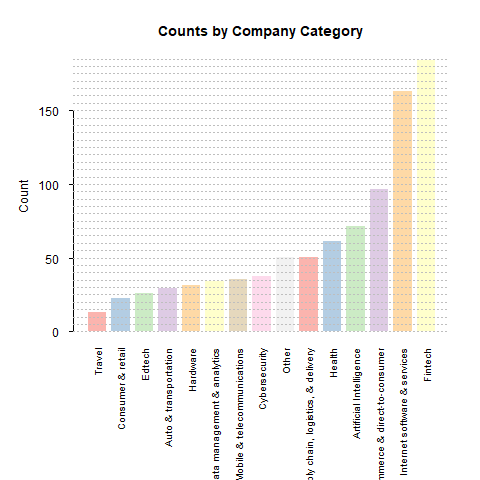

In [1]:
## Order the rows in descending order based on 'Count'
grouped_df <- grouped_df[order(grouped_df$Count), ]

## Use a nice color palette
library(RColorBrewer)
colors <- brewer.pal(length(grouped_df$Category), "Pastel1")

## Set up the plot parameters
par(mar=c(10, 5, 4, 2) + 0.1,
    las=2,
    mgp=c(3, 1, 0),
    tcl=-0.3)

## Create the barplot
barplot(
  grouped_df$Count,
  names.arg=grouped_df$Category,
  col=colors,
  main="Counts by Company Category",
  ylab="Count",
  border="white",
  cex.names=0.8)

## Add grid lines
abline(h=seq(0, max(grouped_df$Count), by=5),
       col="gray", lty="dotted")

## References



CB Insights. The Complete List of Unicorn Companies. CB
Insights. Published 2023. Accessed August
19, 2023. [https://www.cbinsights.com/research-unicorn-companies](https://www.cbinsights.com/research-unicorn-companies)

R Core Team. R: A language and environment for statistical
computing. R Foundation for Statistical Computing; 2022. Accessed
August 21, 2023. [https://www.R-project.org/](https://www.R-project.org/)

Schouwenaars F, Cotton R. Unicorn
companies. DataCamp. Published 2022. Accessed August
19, 2023. [http://bit.ly/ws-unicorn](http://bit.ly/ws-unicorn)



### References formatted in AMA style



-   The names of all authors are inverted (the last name precedes the
    initials of the first and middle names).
-   All authors are separated by a comma, except for the last two
    authors, which are separated by an ampersand (&).
-   The title of the work is followed by the name of the website or
    publisher.
-   The publication year follows the publisher and is followed by the
    access date.
-   The URL is the final component of the citation.

